In [1]:
# importing necessary packages 
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
wine = pd.read_csv('wine-clustering.csv')

In [3]:
wine.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
101,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385


This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

Alcohol

Malic acid

Ash

Alcalinity of ash

Magnesium

Total phenols

Flavanoids

Nonflavanoid phenols

Proanthocyanins

Color intensity

Hue

OD280/OD315 of diluted wines

Proline

OK. It seems we have 3 types of wines in the dataset, and 13 features for each of them. This is a learning project for me. Therefore, I will use following clustering methods:

    * PCA - i know this is not a clustering method but it can help us about clustering
    
    * KMeans
    
    * Mean-Shift Clustering
    
    * Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
    
    * Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
    
    * Agglomerative Hierarchical Clustering


## Descriptives

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
# no missings, 178 variables. get descriptives
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


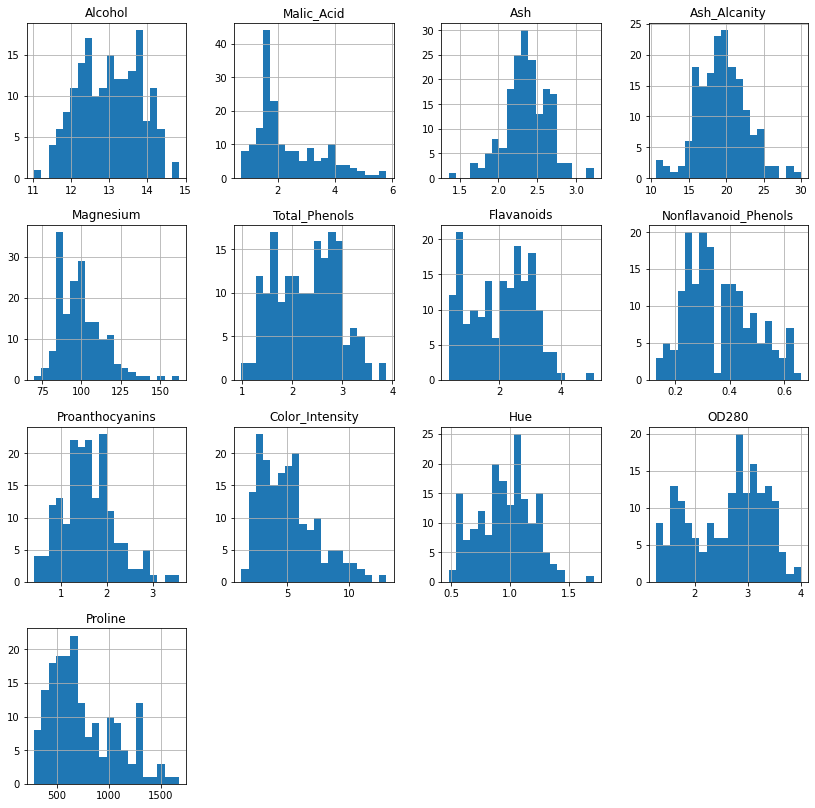

In [6]:
# histograms
_ = wine.hist(figsize=(14,14), bins=20)

In [7]:
print('Shape before outlier removal is : {}'.format(wine.shape))
for col in wine.columns:
    q1, q3 = wine[col].quantile([0.25,0.75])
    IQR = q3-q1
    
    max_val = q3 + 1.5*IQR
    min_val = q1 - 1.5*IQR
    
    outliers = wine[(wine[col]>max_val) | (wine[col]<min_val)].index
    
    wine.drop(outliers, axis=0, inplace=True)

print('Shape after outlier removal is : {}'.format(wine.shape))

Shape before outlier removal is : (178, 13)
Shape after outlier removal is : (161, 13)


In [8]:
from scipy import stats
for column in wine.columns:
    print(f"Skewness of {column} is : {stats.skew(wine[column])}")
    print(f"Kurtosis of {column} is : {stats.kurtosis(wine[column])}")

Skewness of Alcohol is : -0.03989507168728811
Kurtosis of Alcohol is : -0.9485414159127843
Skewness of Malic_Acid is : 0.8552065717746926
Kurtosis of Malic_Acid is : -0.3237924460299615
Skewness of Ash is : -0.22287904260496363
Kurtosis of Ash is : -0.01596605051696054
Skewness of Ash_Alcanity is : 0.06736486759550778
Kurtosis of Ash_Alcanity is : -0.023491019840389704
Skewness of Magnesium is : 0.48212423526286813
Kurtosis of Magnesium is : -0.199426832123764
Skewness of Total_Phenols is : 0.0991811719285487
Kurtosis of Total_Phenols is : -0.8207517403192757
Skewness of Flavanoids is : -0.1168108435119391
Kurtosis of Flavanoids is : -1.2306990223707384
Skewness of Nonflavanoid_Phenols is : 0.4945594687288353
Kurtosis of Nonflavanoid_Phenols is : -0.5230014492198283
Skewness of Proanthocyanins is : 0.2744916521583952
Kurtosis of Proanthocyanins is : -0.020455929962490682
Skewness of Color_Intensity is : 0.6624051724337645
Kurtosis of Color_Intensity is : -0.2131360434465046
Skewness of

In [9]:
# scale the data
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
wine_scaled = ss.fit_transform(wine)

## PCA

In [10]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA() 
pca.fit(wine_scaled)


PCA()

In [11]:
wine_pca = pca.transform(wine_scaled)

In [12]:
# explained variance ratio
wine_pca_var = np.round(pca.explained_variance_ratio_ * 100, 2)
print(f"Total variance explained {wine_pca_var.sum()}%")
print(f"Variance loads of each factor are : {wine_pca_var}")

Total variance explained 99.99%
Variance loads of each factor are : [38.55 20.66  9.51  6.98  5.7   4.3   3.54  2.65  2.39  2.01  1.79  1.33
  0.58]


In [13]:
pca.explained_variance_

array([5.04313617, 2.70251793, 1.24420301, 0.91340121, 0.74614924,
       0.56313075, 0.46316555, 0.34675615, 0.31297127, 0.26265236,
       0.2339036 , 0.17377599, 0.07548675])

In explained variance, we get eigenvalues; for factor analysis we accept factor which has  eigenvalues higher than 1. In this sample we see the first 3 factors describes our n_components.

In [14]:
pca = PCA(n_components = 3)
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)

In [15]:
# explained variance ratio
wine_pca_var = np.round(pca.explained_variance_ratio_ * 100, 2)
print(f"Total variance explained {wine_pca_var.sum()}%")
print(f"Variance loads of each factor are : {wine_pca_var}")

Total variance explained 68.72%
Variance loads of each factor are : [38.55 20.66  9.51]


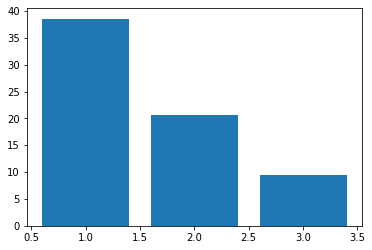

In [16]:
# sree plot
plt.bar(x=range(1,len(wine_pca_var)+1), height = wine_pca_var)

plt.show()

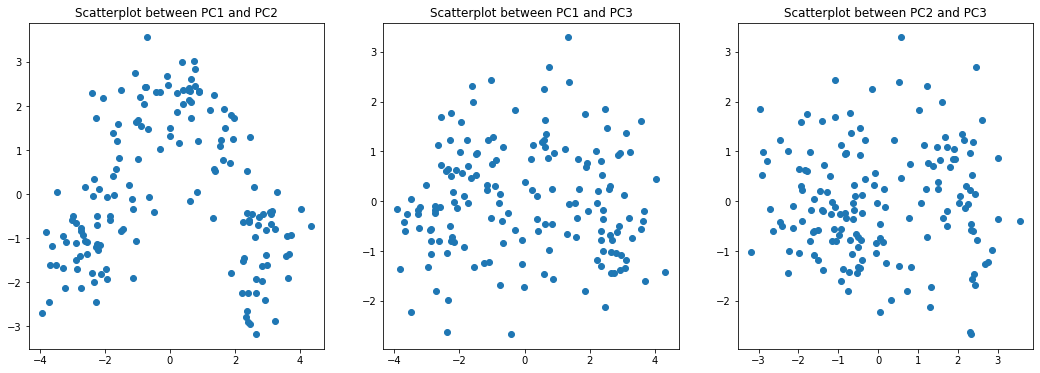

In [17]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(18,6))
ax0.scatter(x=wine_pca[:,0], y= wine_pca[:,1])
ax0.set_title('Scatterplot between PC1 and PC2')
ax1.scatter(x=wine_pca[:,0], y= wine_pca[:,2])
ax1.set_title('Scatterplot between PC1 and PC3')
ax2.scatter(x=wine_pca[:,1], y= wine_pca[:,2])
ax2.set_title('Scatterplot between PC2 and PC3')
plt.title = 'Scatter Matrix of Wine Dataset'

In [18]:
px.scatter_3d(x=wine_pca[:,0], y= wine_pca[:,1], z= wine_pca[:,2],
             title='3D scatter plot of Principle Components')


## KMeans

### Kmeans implementation for wine_scaled

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
# elbow method for neighbors
neighbors = pd.DataFrame(columns=['clusters','intertia','silhouette_score'])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(wine_scaled)
    score_silhouette = silhouette_score(wine_scaled, kmeans.labels_, metric='euclidean') 
    neighbors = neighbors.append({'clusters':i,
                              'intertia': kmeans.inertia_,
                              'silhouette_score':score_silhouette }, ignore_index=True)

In [21]:
neighbors

,clusters,intertia,silhouette_score
0,2.0,1453.230246,0.271669
1,3.0,1080.418730,0.301398
2,4.0,996.588794,0.245016
3,5.0,935.395433,0.210971
4,6.0,883.064599,0.189402
5,7.0,839.464945,0.142092
6,8.0,797.745908,0.139139
7,9.0,769.740801,0.149188


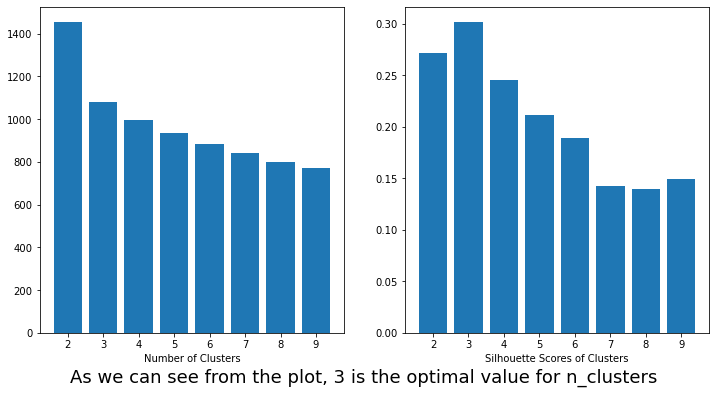

In [22]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,6), sharex=True)
ax0.bar(x = 'clusters', height= 'intertia', data=neighbors)
ax0.set_xlabel('Number of Clusters')
ax1.bar(x='clusters',height='silhouette_score', data=neighbors)
ax1.set_xlabel('Silhouette Scores of Clusters')
_ = plt.figtext(0.5, 0.01,'As we can see from the plot, 3 is the optimal value for n_clusters',
           ha='center', fontsize=18)

In [23]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42,)

kmeans_labels = kmeans.fit_predict(wine_scaled)

pd.Series(kmeans_labels).value_counts()

0    58
2    57
1    46
dtype: int64

In [24]:
# lets's label the data
wine['labels_kmeans0']= kmeans_labels

In [25]:
wine.groupby('labels_kmeans0').agg(['min','max','mean'])

Alcohol                   Malic_Acid                   Ash  \
                   min    max       mean        min   max      mean   min   
labels_kmeans0                                                              
0                11.41  13.86  12.277069       0.74  4.43  1.845345  1.70   
1                12.20  14.16  13.108478       1.24  5.19  3.293261  1.98   
2                12.85  14.83  13.745789       1.35  4.04  2.012456  2.04   

                               Ash_Alcanity  ... Color_Intensity   Hue        \
                 max      mean          min  ...            mean   min   max   
labels_kmeans0                               ...                               
0               2.92  2.259310         15.0  ...        3.011207  0.69  1.45   
1               2.86  2.399783         16.0  ...        6.972174  0.54  0.98   
2               2.87  2.443509         11.2  ...        5.527895  0.82  1.28   

                         OD280                 Proline                     
                    mean   min   max      mean     min   max         mean  
labels_kmeans0                                                             
0               1.060793  1.67  3.64  2.824138     278   886   506.172414  
1               0.700217  1.27  2.47  1.693261     372   880   620.804348  
2               1.058421  2.51  4.00  3.159825     680  1680  1113.157895  

[3 rows x 39 columns]

In [26]:
# plot first 3 columns of the Wine data, to see how the clustering work
fig = px.scatter_3d(x=wine.iloc[:,0], y= wine.iloc[:,1], z = wine.iloc[:,2], color=wine['labels_kmeans0'])

fig.show()

### Kmeans with wine_pca data

In [27]:
# elbow method for neighbors
neighbors = pd.DataFrame(columns=['clusters','intertia','silhouette_score'])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(wine_pca)
    score_silhouette = silhouette_score(wine_pca, kmeans.labels_, metric='euclidean') 
    neighbors = neighbors.append({'clusters':i,
                              'intertia': kmeans.inertia_,
                              'silhouette_score':score_silhouette }, ignore_index=True)

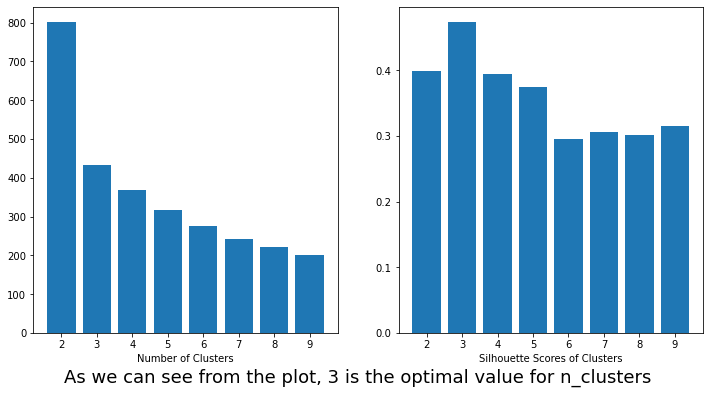

In [28]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,6), sharex=True)
ax0.bar(x = 'clusters', height= 'intertia', data=neighbors)
ax0.set_xlabel('Number of Clusters')
ax1.bar(x='clusters',height='silhouette_score', data=neighbors)
ax1.set_xlabel('Silhouette Scores of Clusters')
_ = plt.figtext(0.5, 0.01,'As we can see from the plot, 3 is the optimal value for n_clusters',
           ha='center', fontsize=18)

In [29]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42,)

kmeans_labels = kmeans.fit_predict(wine_pca)

pd.Series(kmeans_labels).value_counts()

0    58
2    57
1    46
dtype: int64

In [30]:
wine['labels_kmeans1']= kmeans_labels

In [31]:
fig = px.scatter_3d(x=wine.iloc[:,0], y= wine.iloc[:,1], z = wine.iloc[:,2], color=wine['labels_kmeans1'])

fig.show()

## Mean - Shift Clustering

In [32]:
from sklearn.cluster import MeanShift

In [33]:
ms = MeanShift()

In [34]:
ms.fit(wine.iloc[:,0:13])
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [35]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

labels = ms.predict(wine.iloc[:,0:13])

wine['labels_ms'] = labels

number of estimated clusters : 3


In [36]:
px.scatter_3d(x=wine.iloc[:,0], y= wine.iloc[:,1], z = wine.iloc[:,2], color=wine['labels_ms'])

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [38]:
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(wine)
distances, indices = nbrs.kneighbors(wine)

In [39]:
distances = np.sort(distances, axis=0)
distances[:][1]

array([ 0.        ,  2.61070872,  5.55812918,  6.83921779,  7.49746624,
        9.36796136, 10.23955565, 13.16724724, 14.72145373, 14.78788355,
       17.29413484, 20.34235237, 20.73079111, 23.08477853, 25.53121815,
       26.45604468, 26.69381764, 27.77284825, 33.95927561, 34.18775512])

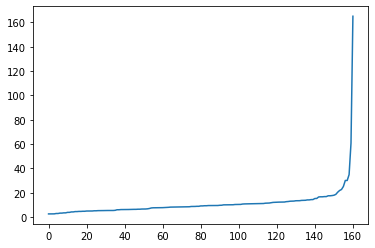

In [40]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [55]:
db = DBSCAN(eps=30, min_samples=16)
db.fit(wine)
y_pred = db.fit_predict(wine)
px.scatter_3d(x=wine.iloc[:,0], y= wine.iloc[:,1], z = wine.iloc[:,2], color=y_pred)

In [56]:
n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_noise_ = list(y_pred).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 123


## Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM) 

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3).fit(wine.iloc[:,0:13])

In [ ]:
gmm_labels = gmm.predict(wine.iloc[:,0:13])

In [ ]:
px.scatter_3d(x=wine.iloc[:,0], y= wine.iloc[:,1], z = wine.iloc[:,2], color=gmm_labels)

 ## Agglomerative Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(wine.iloc[:,0:13])
wine['labels_agg'] = agg.labels_

In [ ]:
px.scatter_3d(x=wine.iloc[:,0], y= wine.iloc[:,1], z = wine.iloc[:,2], color=wine['labels_agg'])